# Introduction and Setup of Picaso

In [1]:
#We first import a few modules from the picaso library alongside numpy and pandas.
from picaso import justdoit as jdi
from picaso import justplotit as jpi
import numpy as np
import pandas as pd

#Now we add the following line to get the output of plot in our notebook.
jpi.output_notebook()

Loading BokehJS ...

In [2]:
#We also check if our reference file path has been set correct.
import os

refdata = os.getenv("picaso_refdata")
print(refdata)

/home/kayahan/picaso/reference


In [3]:
#We can also check what "justdoit" module does.
help(jdi.opannection)

Help on function opannection in module picaso.justdoit:

opannection(wave_range=None, filename_db=None, raman_db=None, resample=1, ck_db=None, deq=False, on_fly=False, gases_fly=None, ck=False, verbose=True)
    Sets up database connection to opacities. 
    
    Parameters
    ----------
    wave_range : list of float 
        Subset of wavelength range for which to run models for 
        Default : None, which pulls entire grid 
    filename_db : str 
        Filename of opacity database to query from 
        Default is none which pulls opacity file that comes with distribution 
    raman_db : str 
        Filename of raman opacity cross section 
        Default is none which pulls opacity file that comes with distribution 
    resample : int 
        Default=1 (no resampling) PROCEED WITH CAUTION!!!!!This will resample your opacites. 
        This effectively takes opacity[::BINS] depending on what the 
        sampling requested is. Consult your local theorist before 
        usin

# Reflected Light Spectra of Cool Planets

# 1-)

* Following the tutorial *"Basics of Reflected Light"*:
    * Plot the Albedo Spectrum of a Jupiter-Like Atmosphere (without any clouds for now)
    * The Wavelength Range: 0.3 $\mu m$ - 1.0 $\mu m$.
    * Vary the Spectral Resolution ($R$) between 50 and 10000.

* What qualitative changes in the spectrum do you notice when you increase the spectral resolution?
* What does that tell you about the nature of the main sources of opacity in the atmosphere?

# Answer:

In [4]:
#Now we get the opacities as follows.
#Note that we are using the Wavelength Range 0.3 to 1.0 microns.
opacity = jdi.opannection(wave_range = [0.3, 1])

In [5]:
#Now we setup an input variable that will contain the inputs we put in.
start_case = jdi.inputs()

#To run the code we need (at the minimum) specific info about the following:
    #Phase Angle
    #Gravity of Planet
    #Temperature, Metallicity, Gravity of the Host Star
    #Atmosphere i.e. Pressure-Temperature (P-T) profile, Checmical Composition and Cloud Properties.

#To add the inputs in we can use "start_case.input_name()".
#For example we can add Phase angle, Gravity and Star Inputs as follows.
    #Note: Phase Angle is in Radians!
    #Note: Star input works as follows => star.(opacity database, pysynphot database, Temperature, Metallicity,
    #log g)

#We define the Phase angle in radians.
start_case.phase_angle(0)

#We define the Gravity of the planet in terms of m/sec^2.
start_case.gravity(gravity = 25, gravity_unit = jdi.u.Unit("m/(s**2)"))

#We define the Host Star and its properties.
start_case.star(opacity, 5000, 0, 4.0)


In [6]:
#Now we need to set Atmospheric Composition.
#There are 2 ways to do this:
    # 1-) Specifying a file path to Model run.
    # 2-) Give arbitrary Pressure, Temperature and Composition directly as a dictionary input.

#We will use the first one since we can import a Jupiter-Like Atmosphere right away.
#Our File Path is as follows.
print(jdi.jupiter_pt())

/home/kayahan/picaso/reference/base_cases/jupiter.pt


In [7]:
#Now we add another input to our "start_case": the atmosphere!
start_case.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace = True)

In [8]:
#Note that Picaso will auto-compute Mixing Ratios and Determine what CIA (Collision Induced Absorption) is 
#necessary and compute the Mean Molecular weight based on these headers.
#We can print what the Jupiter-Like Atmosphere as a Pandas DataFrame table as follows.
comp_file = jdi.pd.read_csv(jdi.jupiter_pt(), delim_whitespace = True)
comp_file.head()

,pressure,temperature,e-,H2,H,H+,H-,VO,TiO,CO2,He,H2O,CH4,CO,NH3,N2,PH3
0,0.000001,150.87,4.500000e-38,0.837,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,0.163,0.000069,0.000466,4.500000e-38,0.000137,5.420000e-17,4.500000e-38
1,0.000001,149.68,4.500000e-38,0.837,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,0.163,0.000035,0.000466,4.500000e-38,0.000137,1.580000e-17,4.500000e-38
2,0.000002,148.40,4.500000e-38,0.837,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,0.163,0.000017,0.000466,4.500000e-38,0.000137,4.370000e-18,4.500000e-38
3,0.000003,147.00,4.500000e-38,0.837,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,0.163,0.000008,0.000466,4.500000e-38,0.000137,1.140000e-18,4.500000e-38
4,0.000004,145.46,4.500000e-38,0.837,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,4.500000e-38,0.163,0.000004,0.000466,4.500000e-38,0.000137,2.740000e-19,4.500000e-38


In [9]:
#Now we create a 1D Reflected Light Spectrum.
#To do this we create our first Spectrum of Jupiter's Reflected Light at full phase.
#Creating a spectrum is again using the "start_case" as follows.
df = start_case.spectrum(opacity)
df.keys()

dict_keys(['wavenumber', 'albedo', 'bond_albedo', 'fpfs_reflected'])

In [10]:
#Now we want to plot our spectrum.
#For this we get the wavenumber, albedo and Relative Flux of the Planet and Star as follows.
wno, alb, fpfs = df["wavenumber"], df["albedo"], df["fpfs_reflected"]

#Now we regrid Wavenumber and Albedo DEPENDING ON THE RESOLUTION as follows.
wno1, alb1 = jdi.mean_regrid(wno, alb, R = 150)
wno2, alb2 = jdi.mean_regrid(wno, alb, R = 1000)
wno3, alb3 = jdi.mean_regrid(wno, alb, R = 5000)
wno4, alb4 = jdi.mean_regrid(wno, alb, R = 10000)

#Now we plot our Spectrums as follows.
jpi.show(jpi.spectrum(wno1, alb1, plot_width = 500, x_range = [0.3, 1]))
jpi.show(jpi.spectrum(wno2, alb2, plot_width = 500, x_range = [0.3, 1]))
jpi.show(jpi.spectrum(wno3, alb3, plot_width = 500, x_range = [0.3, 1]))
jpi.show(jpi.spectrum(wno4, alb4, plot_width = 500, x_range = [0.3, 1]))

## Results:

* *What qualitative changes in the spectrum do you notice when you increase the spectral resolution?*
    * We see that as we increase the Spectral Resolution, the Spectrum gets more detailed as expected.
    * We can see i.e. resolve smaller transitions individually as Spectral Resolution goes higher.
    * But if the Resolution is low, we can't see all of the transitions/absorptions as they overlap onto one another i.e. we can not determine them individually.

* *What does that tell you about the nature of the main sources of opacity in this atmosphere?*
    * Depending on the Wavelength of the absorption lines, we can determine what could be the source of opacity at that wavelength since we know which atomic transitions happen at given wavelengths.

# 2-)

* Investigate which molecules are the Dominant sources of Opacity for your model atmosphere, in the Wavelength Range we are working with. (0.3 $\mu m$ - 1.0 $\mu m$)
    * Molecules among those commonly found in the Atmospheres of Cold Giant Planets, e.g. water, methane, ammonia, carbon monoxide, carbon dioxide, ...

In [11]:
#We can exclude molecules to see how it influences the spectrum to investigate which molecules are dominant
#sources of opacity.
#For this, we change our Atmosphere on our "start_case".
#We can define a list that contains the molecules we want to exclude.
molecule_exclude_list = ["H2O", "CH4", "NH3", "CO", "CO2"]

#Now we will loop over this list and check what happens to the spectrum if we exclude the molecule.
for i in range(len(molecule_exclude_list)):
    #We now define our atmosphere.
    start_case.atmosphere(filename = jdi.jupiter_pt(), exclude_mol = molecule_exclude_list[i], 
                          delim_whitespace = True)

    #We now create our new spectrum, excluding the molecules.
    df = start_case.spectrum(opacity)

    #We now get the spectrum without the molecules we have excluded.
    wno_nomol, alb_nomol, fpfs_nomol = df["wavenumber"], df["albedo"], df["fpfs_reflected"]

    #Now we regrid Wavenumber and Albedo with the R = 150 as follows.
    wno_test, alb_test = jdi.mean_regrid(wno_nomol, alb_nomol, R = 150)

    #We now plot our Spectrum with all the molecules present.
    #Note: wno1 and alb1 are from the spectrum we have defined with R = 150 on Part 1!
    fig = jpi.spectrum(wno, alb, plot_width = 700)
    
    #Now we add a "line" that will represent our Spectrum without the molecules we have excluded as follows.
    fig.line(1e4 / wno_test, alb_test, line_width = 2, color = "red")

    #We also add a title to our figure.
    fig.title.text = f"Spectrum with {molecule_exclude_list[i]} Molecule Excluded"
    fig.title.align = "center"
    
    #We get our Spectrum Comparison.
    jpi.show(fig)

## Results:

* What are the dominant sources of opacity for your Model Atmosphere, in the wavelength range we are working with (0.3 $\mu m$ - 1.0 $\mu m$)?
    * We can see that the molecules $CO$ and $CO_2$ do not really change the spectrum (shown in red), so they are not the dominant sources of absorption.
    * As for the molecules $H_2O$ and $CH_4$ we can see that there are very noticeable differences in our spectrum, which means that these molecules are dominant sources of absorption in our spectrum.

# 3-)

* Add simple clouds to your model atmosphere by specifying the properties of the cloud layer.
* Example:
    * Asymmetry Factor
    * Single Scattering Albedo
    * Opacity
    * Pressure Level
    * Thickness

* Discuss the meaning (definition) of each of these quantities.
* Investigate how they affect the resulting spectra by varying their values.
* Note: *See tutorial "Adding Cloud Opacity, Scattering, Asymmetry"*

In [12]:
#For the sake of completeness, we redefine the things we have defined on our "Q1".

############################################# SAME AS QUESTION 1 ##############################################

#We get the opacities as follows.
#Note that we are using the Wavelength Range 0.3 to 1.0 microns.
opacity1 = jdi.opannection(wave_range = [0.3, 1])

#Now we setup an input variable that will contain the inputs we put in.
case1 = jdi.inputs()

#We define the Phase angle in radians.
case1.phase_angle(0)

#We define the Gravity of the planet in terms of m/sec^2.
case1.gravity(gravity = 25, gravity_unit = jdi.u.Unit("m/(s**2)"))

#We define the Host Star and its properties.
#This is in terms of Kelvin, Log Metal and Log cgs
case1.star(opacity1, 5000, 0, 4.0)

#We define the Atmosphere of the Planet.
case1.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace = True)

###############################################################################################################

In [13]:
#Now we will again use Jupiter Cloud Profile.
#For this we first check if the directory path is correct.
print(jdi.jupiter_cld())

/home/kayahan/picaso/reference/base_cases/jupiterf3.cld


In [14]:
#Now we setup the Model Clouds for our case1 as follows.
case1.clouds(filename = jdi.jupiter_cld(), delim_whitespace = True)

#Now we create our Spectrum.
#Creating a spectrum is again using the "case1" as follows.
df = case1.spectrum(opacity1)

#Now we want to plot our spectrum.
#For this we get the wavenumber, albedo and Relative Flux of the Planet and Star as follows.
wno1, alb1, fpfs1 = df["wavenumber"], df["albedo"], df["fpfs_reflected"]

#Now we regrid Wavenumber and Albedo DEPENDING ON THE RESOLUTION as follows.
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)

#Now we show our Spectrum as follows.
jpi.show(jpi.spectrum(wno1, alb1, plot_width = 700))

* Side Note: You can see that with clouds our Spectrum has completely changed compared to the Question 1.
* High Altitude Water Clouds have increased the Albedo Dramatically.
* Below, you can see the **image** of the Plot we got from Question 1 when we didn't have any clouds introduced.

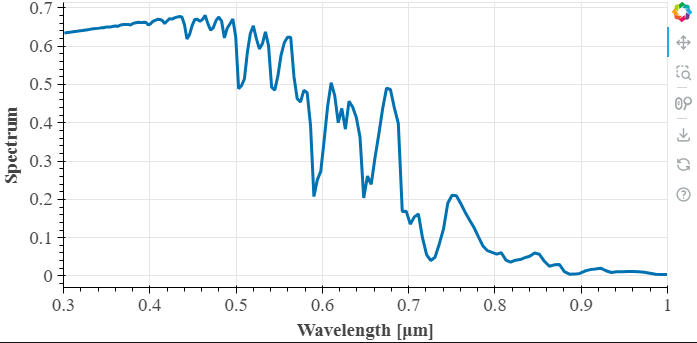

In [15]:
#Now we want to define the cloud properties.
#For this we will use the following arguments:
    #1-) g0: Asymmetry Factor of the cloud => Value Between 0 - 1
    #2-) w0: Single Scattering Albedo => Value Between 0 - 1
    #3-) opd: Total Exctinction (Tau) of each layer => Not cumulative!
    #4-) p: Pressure level in log10 bars
    #5-) dp: The Cloud Thickness in log10 bars! (CAN NOT BE NEGATIVE!)

#Now we can define our clouds using the arguments above to make it more specific.
case1.clouds(g0 = [0.9], w0 = [0.8], opd = [0.5], p = [0.0], dp = [1.0])

#Creating a spectrum is using the "case1" as follows.
df = case1.spectrum(opacity1)

#Now we plot our spectrum.
wno1, alb1, fpfs1 = df["wavenumber"], df["albedo"], df["fpfs_reflected"]

#Now we regrid Wavenumber and Albedo DEPENDING ON THE RESOLUTION as follows.
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)

#Now we show our Spectrum as follows.
jpi.show(jpi.spectrum(wno1, alb1, plot_width = 700))

* We see that our Spectrum has once again changed depending on the parameters we have defined:
    * Asymmetry Factor
    * Single Scattering Albedo
    * Opacity
    * Pressure Level
    * Thickness

* Now we will compare different values of these Parameters and keeping the other parameters constant.

In [16]:
#For this we define a second case so that we can show how the parameters change the spectrum side-to-side.
opacity2 = jdi.opannection(wave_range = [0.3, 1])
case2 = jdi.inputs()
case2.phase_angle(0)
case2.gravity(gravity = 25, gravity_unit = jdi.u.Unit("m/(s**2)"))
case2.star(opacity2, 5000, 0, 4.0)
case2.atmosphere(filename = jdi.jupiter_pt(), delim_whitespace = True)
case2.clouds(filename = jdi.jupiter_cld(), delim_whitespace = True)

In [17]:
#We import the following to show two plots together.
from bokeh.layouts import row

## Results:

### The Default Spectrum we have with our Atmosphere & Clouds

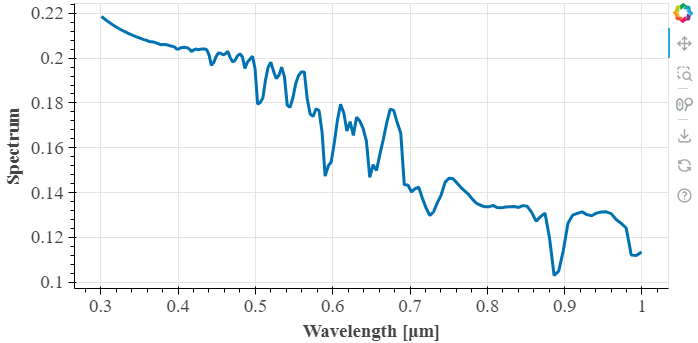

### 1-) Asymmetry Factor ($g_0$)

* Represents the Angular Distribution of Scattered Light by a Medium.
* Our Medium in this case is clouds, hazes and particles in the atmosphere.
* **It charactizes the direction of scattering:**
    * **1:** Forward Scattering
    * **0:** Isotropic Scattering (Equal in all Directions)
    * **-1:** Backward Scattering

* Note: **Since we don't expect a Backward Scattering, we always use Asymmetry Factor in the range 0 to 1!**

In [18]:
#We first define and plot the first case.
case1.clouds(g0 = [0], w0 = [0.8], opd = [0.5], p = [0.0], dp = [1.0])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with Asymmetry Factor g0 = 0"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.8], w0 = [0.8], opd = [0.5], p = [0.0], dp = [1.0])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with Asymmetry Factor g0 = 0.8"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

* **Graph on the Left:** Shows Isotropic Scattering
* **Graph on the Right:** Shows Forward Scattering

* We see that when there is Isotropic Scattering, as expected, some of our lines get lost since the light scattered from the clouds propagates to all directions equally.
* But when there is Forward Scattering, the light hits the clouds and gets scattered towards the line of sight of the observer.
* **For that reason, we see more features when the Asymmetry Factor is higher, which means that there is Forward Scattering.**

### 2-) Single Scattering Albedo ($w_0$)

* Represents the Ratio of Scattering to Extinction by Clouds, Hazes and/or Particles in the Exoplanet Atmospheres.

$$ w_0 = {{Scattering} \over Extinction} $$

* Gives the Fraction of:
    * 1-) **The Incident (Incoming) Light that is scattered by the Medium.**
    * 2-) **Total Extinction** *(Which is Scattering + Absorption!!!)*

* The values it can have are as follows:
    * **1:** Full Scattering & No Absorption
    * **0:** Full Absorption & No Scattering

In [19]:
#We first define and plot the first case.
case1.clouds(g0 = [0.9], w0 = [0.2], opd = [0.5], p = [0.0], dp = [1.0])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with Single Scattering Albedo w0 = 0.2"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.9], w0 = [1], opd = [0.5], p = [0.0], dp = [1.0])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with Single Scattering Albedo w0 = 1"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

* **Graph on the Left:** Lots of Absorption from the Clouds in the Exoplanet Atmosphere.
* **Graph on the Right:** No Absorption from the Clouds in the Exoplanet Atmosphere, only scattering.

* The graph on the left shows us when there is a lot of absorption from the clouds we lose almost all the line features that is coming from the Exoplanet Atmosphere.
* Conversely, we see that when there is no absorption from the clouds, we actually see the spectrum from the atmosphere!
* **If there is no absorption from the clouds, we would see the spectrum from the Exoplanetary Atmosphere without much of the information lost.**

### 3-) Opacity ($opd$):

* Represents the amount of absorption the Exoplanet Atmosphere does at various wavelengths.
* In the `picaso` Library:
    * **`opd`** represents the **Total Extinction ($\tau$)** of each layer of the Atmosphere!
    * Note that it is not cumulative!

In [20]:
#We first define and plot the first case.
case1.clouds(g0 = [0.9], w0 = [0.8], opd = [0], p = [0.0], dp = [1.0])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with Total Extinction τ = 0"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.9], w0 = [0.8], opd = [1], p = [0.0], dp = [1.0])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with Total Extinction τ = 1"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

* **Graph on the Left:** The Cloud Opacity is low, which means the light can go through the clouds for long distances without being absorbed.
* **Graph on the Right:** The Cloud Opacity is high, which means the light can't travel long through the clouds without being absorbed.

* Graph on the Left again shows us the Spectrum we would get if there were no clouds on the Exoplanet Atmosphere.
* As for the graph on the right, we see that most of the light from the Exoplanet Atmosphere is absorbed due to the clouds, which resulted in line features again being lost.
* **If the Opacity of the Clouds is low, which means the light from the Exoplanet Atmosphere doesn't get absorbed by the Clouds, we would see the full spectrum of the Exoplanet Atmosphere without much of the information lost.**

### 4-) Pressure Level ($p$)

* Represents the Specific Altitude or Depth in the Exoplanet Atmosphere.
* **It is used to analyze the Vertical Structure of the atmosphere!**

* **Lower Pressure Level:** Means that we are at higher altitudes/lower depth.
* **Higher Pressure Level:** Means that we are at lower altitudes/higher depth.

In [21]:
#We first define and plot the first case.
case1.clouds(g0 = [0.9], w0 = [0.8], opd = [0.5], p = [0], dp = [1.0])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with Pressure Level p = 0"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.9], w0 = [0.8], opd = [0.5], p = [100.0], dp = [1.0])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with Pressure Level p = 100.0"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

* **Graph on the Left:** The Pressure Level is Low, which means that we are at the highest altitude of the Exoplanet Atmosphere. (Comparing it to Earth Atmosphere: Exosphere)
* **Graph on the Right:** The Pressure Level is High, which means that we are at the lowest altitude of the Exoplanet Atmosphere. (Comparing it to Earth Atmosphere: Stratosphere - Troposphere)

* Graph on the Left shows the Spectrum we would get from the Exoplanet Atmosphere with the defined Cloud properties if we were to observe it.
* Graph on the Right shows the Spectrum we would get if we could make it pass the clouds and take the spectrum from that depth.
* **As we go deeper into the Atmosphere, the amount of clouds would decrease since the clouds form at a certain altitute.**
* **As a result, if we are deeper in the Atmosphere, we would get the Spectrum of the Atmosphere straight away without much of the line features lost.**

### 5-) Thickness ($dp$)

* Represents the Cloud Thickness in the Exoplanet Atmosphere.

In [22]:
#We first define and plot the first case.
case1.clouds(g0 = [0.9], w0 = [0.8], opd = [0.5], p = [0.0], dp = [0.2])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with Cloud Thickness dp = 0.2"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.9], w0 = [0.8], opd = [0.5], p = [0.0], dp = [1.0])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with Cloud Thickness dp = 1.0"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

* **Graph on the Left:** The Cloud Thickness is low, which means that the Clouds in the Exoplanet Atmosphere is thin.
* **Graph on the Right:** The Cloud Thickness is high, which means that the Clouds in the Exoplanet Atmosphere is thick.

* Graph on the Left shows the Spectrum we would get if the clouds in the Exoplanet Atmosphere were thin, which is basically the Spectra of the Exoplanet Atmosphere with some losses due to the thin cloud still having some effect on the absorptions.
* Graph on the right shows the Spectrum we would get if the clouds in the Exoplanet Atmosphere were thick, which means that the clouds affect the spectra significantly.
* That results in us getting the Default Spectrum we had by including the clouds in our atmospheric model.
* **If the clouds in the Exoplanet Atmosphere are translucent i.e. thin, we would get a spectrum that is pretty close to the Exoplanet Atmosphere's Spectrum.**
* **If the clouds in the Exoplanet Atmosphere are opaque i.e. thick, we would get a spectrum that is heavily affected due to the clouds in the Exoplanet Atmosphere.**

# 4-)

* Are there any degeneracies between different model parameters?
* **In other words:**
    * Is it possible to obtain similar spectra for different combinations of parameters?
    * Or does each parameter leave a unique signature in the resulting spectrum?

* Briefly discuss the implications of your findings.

## Results:

* **It is possible to obtain similar spectra for different combination of the Cloud Parameters!**
* **But:**
    * It depends on the relations between the parameters as well.
    * For example Single Scattering Albedo and Opacity are related to one another significantly.
    * **Some combinations may lead to similar spectra, while others might lead to a completely different spectra profile.**

* A similar example can be given by light curve fitting:
    * The Model Parameters can have different values but still have the same fit result!

* **That does not mean that the Parameters don't have their own signature in the spectrum!**
* All of them affect the spectra differently.
* **But their combinations could result in a similar spectra!**

* Below is an example where:
    * Asymmetry Factor has decreased.
    * Opacity has decreased.
    * Rest has been kept constant.
    * **We still get a similar spectra!**

In [23]:
#We first define and plot the first case.
case1.clouds(g0 = [0.9], w0 = [0.8], opd = [1.0], p = [0.0], dp = [0.2])
df1 = case1.spectrum(opacity1)
wno1, alb1, fpfs1 = df1["wavenumber"], df1["albedo"], df1["fpfs_reflected"]
wno1, alb1 = jdi.mean_regrid(wno1, alb1, R = 150)
fig1 = jpi.spectrum(wno1, alb1, plot_width = 400)
fig1.title.text = f"Spectrum with g0 = 0.9, τ = 1"
fig1.title.align = "center"

#We redo the whole process for the other value of the parameter we are checking.
case2.clouds(g0 = [0.5], w0 = [0.8], opd = [0.5], p = [0.0], dp = [0.2])
df2 = case2.spectrum(opacity2)
wno2, alb2, fpfs2 = df2["wavenumber"], df2["albedo"], df2["fpfs_reflected"]
wno2, alb2 = jdi.mean_regrid(wno2, alb2, R = 150)
fig2 = jpi.spectrum(wno2, alb2, plot_width = 400)
fig2.title.text = f"Spectrum with g0 = 0.5, τ = 0.5"
fig2.title.align = "center"

#Now we show them next to one another.
jpi.show(row(fig1, fig2))

# Transmission Spectra of Warm Planets

# 5-)

* Follow the tutorial *"Computing Transmission Spectroscopy"*.
* Plot the Transmission Spectrum for Hot Jupiter Model Atmosphere in the Wavelength Range accessible with the *NIRSpec* Instrument onboard the *James Webb Space Telescope (JWST)*. ($0.6 - 5$ $\mu m$)

In [24]:
#What we will do is pretty similar to the Thermal Emission/Reflected Light.
#We will use Hot Jupiter Template for this.

#We get the opacities as follows.
#Note that we are using the Wavelength Range 0.6 to 5.0 microns.
opacity3 = jdi.opannection(wave_range = [0.6, 5])

#Now we setup an input variable that will contain the inputs we put in.
case3 = jdi.inputs()

#We define the Phase angle in radians.
case3.phase_angle(0)

#We define the Gravity of the planet.
#This is where it is a bit different than what we did before.
#This time we won't say gravity = 25 etc.
#We need to define gravity in terms of Radius and Mass since we will need them in the Flux Calculations.
case3.gravity(mass = 1, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))

#We define the Host Star and its properties.
#Again it is different than what we did before!
#This time, we have to specify the Radius of the Star as well!
case3.star(opacity3, 4000, 0.0122, 4.437, radius = 0.7, radius_unit = jdi.u.Unit("R_sun"))

#We define the Atmosphere of the Planet.
case3.atmosphere(filename = jdi.HJ_pt(), delim_whitespace = True)

#For gas giants we can use the following "Reference Pressure" which is 10 bar.
#Note that the PICASO default is 1 bar.
case3.approx(p_reference = 10)

In [25]:
#Now we create our Spectrum.
#Note that this time we use "calculation" keyword!
#For our case calculation has to be transmission!
df = case3.spectrum(opacity3, full_output=True, calculation='transmission')

#Now we want to plot our spectrum.
#For this we get the wavenumber and Relative Flux of the Planet and Star as follows.
wno, rprs2  = df['wavenumber'] , df['transit_depth']

#Now we regrid Wavenumber and Relative Flux DEPENDING ON THE RESOLUTION as follows.
wno, rprs2 = jdi.mean_regrid(wno, rprs2, R=150)

#We can get the full output as follows.
full_output = df['full_output']

#To print the full output, remove the "#" below.
#full_output

In [26]:
#Now we can first show the Pressure - Temperature (PT) Profile as follows.
pt_fig = jpi.pt(full_output, plot_width = 700)
pt_fig.title.align = "center"
jpi.show(pt_fig)

#We can also use just one line to show the plot.
#jpi.show(jpi.pt(full_output, plot_width = 700))

In [27]:
#We can also show the Mixing Ratios as follows.
mixingratio_fig = jpi.mixing_ratio(full_output, plot_width = 700)
mixingratio_fig.title.align = "center"
jpi.show(mixingratio_fig)

#We can again also use just one line to show the plot.
#jpi.show(jpi.mixing_ratio(full_output, plot_width = 700))

In [28]:
#Now we can (finally) also plot the Transmission Spectrum as follows.
transmission_spectrum = jpi.spectrum(wno, rprs2 * 1e6, plot_width = 700)
transmission_spectrum.title = "Transmission Spectrum"
transmission_spectrum.title.align = "center"
jpi.show(transmission_spectrum)

#We can again also use just one line to show the plot.
#jpi.show(jpi.spectrum(wno, rprs2 * 1e6, plot_width = 700))

# 6-)

* Investigate which Atomic and Molecular Species contribute significantly to the Opacity of your Model Atmosphere in the Wavelength Range of *NIRSpec*.
* Common Species include the following:
    * 1-) Water ($H_2O$)
    * 2-) Carbon Monoxide ($CO$)
    * 3-) Carbon Dioxide ($CO_2$)
    * 4-) Methane ($CH_4$)
    * 5-) Sodium ($Na$)
    * 6-) Potassium ($K$) etc.

* Feel free to explore other species as well.
* Discuss your findings.

In [ ]:
#We first define lists for the parameters of our Atmosphere alongside legend names.
wave_no, flux, legends = [], [], []

#Now we define a loop where:
    #We will have the list of the Molecules we will exclude.
    #After going over that list, we will also plot our "original" spectrum with all the species included.
    #On the loop, we get the Wavenumbers, Fluxes and the Legend names.
    #After the loop, we'll use the lists to plot the results we got from the loop.

#We define our loop and species we will exclude.
for species in ["H2O", "CO", "CO2", "CH4", "Na", "K", "H2", None]:
    #We exclude the species from our atmosphere.
    case3.atmosphere(filename = jdi.HJ_pt(), exclude_mol = species, delim_whitespace = True)
    
    #Create the spectrum as follows.
    df = case3.spectrum(opacity3, full_output = True, calculation = "transmission")

    #We get the wavenumber and Relative Flux of the Planet and Star as follows.
    wno, rprs2  = df['wavenumber'] , df['transit_depth']

    #Now we regrid Wavenumber and Relative Flux DEPENDING ON THE RESOLUTION as follows.
    wno, rprs2 = jdi.mean_regrid(wno, rprs2, R = 150)

    #We add the wavenumbers and flux onto our lists as follows.
    wave_no += [wno]
    flux += [rprs2]

    #Now we create our legend.
    if species == None:
        legend = "All"

    else:
        legend = f"No {species}"

    legends += [legend]

#Now we show the resulting plot as follows.
comparison_fig = jpi.spectrum(wave_no, flux, legend = legends, plot_width = 800, plot_height = 500)
comparison_fig.title = "Comparison of Transmission Spectra"
comparison_fig.title.align = "center"
jpi.show(comparison_fig)

## Results:

* Let's analyze the Molecules one by one.

* **1-) No $H_2O$:**
    * We can see from the plot that the **most of the contribution to the Opacity comes from Water!**
    * Without Water, we see a significant decrease on the Opacity of the Atmosphere.
    * But at around $4.1 - 4.6$ $ \mu m$ we can see that it does not contribute to the Opacity.

* **2-) No $CO$:**
    * It does not contribute to the opacity that much.
    * But at around $4.7 - 5$ $ \mu m$ we can see that it noticably contributes to the Opacity.

* **3-) No $CO_2$:**
    * Again it does not contribute to the opacity that much.
    * Compared to $CO$, $CO_2$ has more contribution to Opacity.
    * Especially around $4.2 - 4.7$ $ \mu m$ we can see that it significantly contributes to the Opacity.

* **4-) No $CH_4$:**
    * It doesn't contribute to the opacity at all.
    * We can only notice a small contribution from it around $3.3 - 3.6$ $ \mu m$.

* **5-) No $Na$:**
    * At the Wavelength Range of NIRSpec, it doesn't contribute to the opacity at all except for one small wavelength range.
    * We can notice a significant contribution from it around $0.6 - 0.8$ $ \mu m$.

* **6-) No $K$:**
    * At the Wavelength Range of NIRSpec, it does not contribute to the opacity at all.
    * We can only notice some contribution from it around $0.8 - 1.0$ $ \mu m$.

* **7-) No $H_2$:**
    * At the Wavelength Range of NIRSpec, it does not contribute to the opacity at all.

# 7-)

* Vary the surface gravity of your planet.
* What effect does this have on the resulting spectrum?
* Discuss the physical reasons behind this.

In [ ]:
#For this we'll use our spectrum that contains all the molecules.
#Now we create our Spectrum.
#Note that this time we use "calculation" keyword!
#For our case calculation has to be transmission!
case3.gravity(mass = 1, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))
df = case3.spectrum(opacity3, full_output = True, calculation = "transmission")

#Now we want to plot our spectrum.
#For this we get the wavenumber and Relative Flux of the Planet and Star as follows.
wno, rprs2  = df["wavenumber"] , df["transit_depth"]

#Now we regrid Wavenumber and Relative Flux DEPENDING ON THE RESOLUTION as follows.
wno, rprs2 = jdi.mean_regrid(wno, rprs2, R = 150)

#We plot our Transmission Spectrum.
fig = jpi.spectrum(wno, rprs2 * 1e6, plot_width = 700)
fig.title = "Transmission Spectrum (M = 1 Mj and R = 1.2 Rj)"
fig.title.align = "center"
jpi.show(fig)

#Now we increase our Gravity of the Planet and see how it changes the Spectrum.
#Note that g = GM/R^2 so if we increase the mass, we'll increase the gravity.
case3.gravity(mass = 100, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))
df_2 = case3.spectrum(opacity3, full_output = True, calculation = "transmission")
wno, rprs2  = df_2["wavenumber"] , df_2["transit_depth"]
wno, rprs2 = jdi.mean_regrid(wno, rprs2, R = 150)
fig = jpi.spectrum(wno, rprs2 * 1e6, plot_width = 700)
fig.title = "Transmission Spectrum (M = 100 Mj and R = 1.2 Rj)"
fig.title.align = "center"
jpi.show(fig)

#Now we decrease the Gravity of the Planet and see how it changes the spectrum.
case3.gravity(mass = 0.1, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))
df_3 = case3.spectrum(opacity3, full_output = True, calculation = "transmission")
wno, rprs2  = df_3["wavenumber"] , df_3["transit_depth"]
wno, rprs2 = jdi.mean_regrid(wno, rprs2, R = 150)
fig = jpi.spectrum(wno, rprs2 * 1e6, plot_width = 700)
fig.title = "Transmission Spectrum (M = 0.1 Mj and R = 1.2 Rj)"
fig.title.align = "center"
jpi.show(fig)

* **Gravity is the physical force that is keeping the atmosphere around the Exoplanet!**

* **If the gravity increases:**
  * **The Atmosphere will become more opaque since it will be pulled closer to the surface of the Exoplanet.**
  * Atmosphere becomes more compressed and more dense!
  * **As a result:**
      * 1-) **The difference between the minimum and maximum amount of light that is blocked is small!** (Less variability in the amount of light that can go through the atmosphere!)
      * 2-) **The Transmission Spectrum will decrease since Opacity goes up and the amount of light that can pass through in general decreases!**

* **If the gravity decreases:**
  * **The Atmosphere will become more transparent since the gravity does not pull the atmosphere to the surface of the Exoplanet as strong as it used to before.**
  * So the atmosphere will basically "spread out" in a way.
  * Atmosphere becomes less compressed and less dense!
  * **As a result:**
      * 1-) **The difference between the minimum and maximum amount of light that is blocked is huge!** (Large variability in the amount of light that can go through the atmosphere!)
      * 2-) **The Transmission Spectrum will increase since Opacity goes down and the amount of light that can pass through in general increases!**

* We see the exact things we have discussed in our plots!

* **When gravity is increased:**
    * The maximum amount of light that is blocked by the Exoplanet Atmosphere decreases from 33400 to 31054.
    * The minimum amount of light that is blocked by the Exoplanet Atmosphere decreases from 32200 to 31044.
    * The difference between the maximum and minimum amount of light is blocked by the Exoplanet Atmosphere is very small! (About 10!)

* **When gravity is decreased:**
    * The maximum amount of light that is blocked by the Exoplanet Atmosphere increases from 33400 to 85000.
    * The minimum amount of light that is blocked by the Exoplanet Atmosphere decreases from 32200 to 50000.
    * The difference between the maximum and minimum amount of light that is blocked by the Exoplanet Atmosphere is very large! (About 35000!)

In [ ]:
#We set our case3 gravity back to the normal gravity we have defined for the next question.
case3.gravity(mass = 1, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))

# 8-)

* Add a simple model of Grey (wavelength independent) Clouds to your atmosphere.
* What is the effect of clouds on the following?
    * The Mean Transit Depth
    * The Amplitude of Spectral Features 

In [ ]:
#Before we create our clouds, let's get our spectrum without the clouds.
df = case3.spectrum(opacity3, full_output = True, calculation = "transmission")
wno, rprs2  = df["wavenumber"] , df["transit_depth"]
wno, rprs2 = jdi.mean_regrid(wno, rprs2, R = 150)

In [ ]:
#We first create our grey clouds.
#For this we do the following:
    #p: Maximum Cloud Pressure
    #dp: Cloud Thickness
    #opd: Opacity (Optically Thick cloud => 1)
    #Asymmetry and Single Scattering are not used in Transits so we set them to 0 - 1.

case3.clouds(p = [1], dp = [4], opd = [1], g0 = [0], w0 = [0])

#Now we get our spectrum as follows.
df_grey = case3.spectrum(opacity3, full_output = True, calculation = "transmission")

#Now we want to plot our spectrum.
#For this we get the wavenumber and Relative Flux of the Planet and Star as follows.
wno, rprs2_grey  = df_grey['wavenumber'] , df_grey['transit_depth']

#Now we regrid Wavenumber and Relative Flux DEPENDING ON THE RESOLUTION as follows.
wno, rprs2_grey = jdi.mean_regrid(wno, rprs2_grey, R = 150)

#We do the same thing to obtain our
#Now we show our comparison spectrum.
fig = jpi.spectrum([wno, wno], [((rprs2 - np.mean(rprs2)) * 1e6), (((rprs2_grey - np.mean(rprs2_grey))) * 1e6)], 
                   legend = ["Cloud Free Spectrum", "Grey Cloud Spectrum"], plot_width = 800)
fig.title = "Cloud Free and Grey Cloud Transmission Spectrum Comparison"
fig.title.align = "center"
fig.legend.location = "top_left"
jpi.show(fig)

* **Effects of Clouds on the Mean Transit Depth:**
    * 1-) Clouds could block and/or scatter the light from the Host Star.
    * 2-) Clouds could also absorb the light coming from the Host Star.
    * 3-) As a result, this can cause the amount of light we receive from the Host Star to decrease in our Light Curve.
    * 4-) Since we are talking about Grey Clouds and they are independent of the wavelength, we would see this effect on the whole spectrum.
    * 5-) This would mean that our Transit Depth would be shallower compared to a Cloudless case, regardless of the wavelength.

* **Effects of Clouds on the Amplitude of Spectral Features:**
    * 1-) Grey Clouds are like we have discussed Wavelength independent.
    * 2-) For that reason, they would absorb and scatter the light across all wavelengths.
    * 3-) Thats why on the Transmission Spectrum plot we have got from the `picaso` code we can see the same change for all the wavelengths!
    * 4-) As for the Spectral Features, we would expect the lines to have a decrease on their amplitude since we don't receive all the light coming from the Host Star.
    * 5-) So we would basically receive the same lines with less line strengths!

# Thermal Emission Spectra of Warm Planets

# 9-)

* Follow the tutorial *"Computing Thermal Fluxes"*.
* Plot the Thermal Emission Spectrum for a Hot Jupiter Model Atmosphere in the *NIRSpec* Wavelength Range.

In [ ]:
#Again computing the Thermal Flux is almost the same as Reflected Light.
#We need couple tweaks just like the previous part.
#For completeness we define the Hot Jupiter once again.

############################################ SAME AS PREVIOUS PART ############################################

#We get the opacities as follows.
#Note that we are using the Wavelength Range 0.6 to 5.0 microns.
opacity4 = jdi.opannection(wave_range = [0.6, 5])

#Now we setup an input variable that will contain the inputs we put in.
case4 = jdi.inputs()

#We define the Phase angle in radians.
case4.phase_angle(0)

#We define the Gravity of the planet.
#This is where it is a bit different than what we did before.
#This time we won't say gravity = 25 etc.
#We need to define gravity in terms of Radius and Mass since we will need them in the Flux Calculations.
case4.gravity(mass = 1, mass_unit = jdi.u.Unit("M_jup"),
              radius = 1.2, radius_unit = jdi.u.Unit("R_jup"))

#We define the Host Star and its properties.
#Again it is different than what we did before!
#This time, we have to specify the Radius of the Star as well!
case4.star(opacity4, 4000, 0.0122, 4.437, radius = 0.7, radius_unit = jdi.u.Unit("R_sun"))

#We define the Atmosphere of the Planet.
case4.atmosphere(filename = jdi.HJ_pt(), delim_whitespace = True)

#We can also include clouds by uncommenting the line below.
#case4.clouds(filename = jdi.HJ_cld(), delim_whitespace = True)

###############################################################################################################


In [ ]:
#Now we create our Spectrum.
#Note that this time we use "calculation" keyword!
#For our case calculation has to be thermal!
df = case4.spectrum(opacity4, full_output = True, calculation = 'thermal')

#Now we want to plot our spectrum.
#For this we get the wavenumber, Relative Flux of the Planet and Star and Planet Flux itself as follows.
wno, fpfs, fp  = df['wavenumber'] , df['fpfs_thermal'], df['thermal']

#Now we regrid Wavenumber and Relative Flux DEPENDING ON THE RESOLUTION as follows.
wno_bin, fpfs_bin = jdi.mean_regrid(wno, fpfs, R=150)

#We also regrid Wavenumber and Planet Flux DEPENDING ON THE RESOLUTION as follows.
wno_bin, fp_bin = jdi.mean_regrid(wno, fp, R=150)

#We can get the full output as follows.
full_output = df['full_output']

#To print the full output, remove the "#" below.
#full_output

In [ ]:
#Again for completeness we will plot the Pressure - Temperature Plot and Mixing Ratios as follows.

#Now we can first show the Pressure - Temperature (PT) Profile as follows.
pt_fig = jpi.pt(full_output, plot_width = 700)
pt_fig.title.align = "center"
jpi.show(pt_fig)

#We can also use just one line to show the plot.
#jpi.show(jpi.pt(full_output, plot_width = 700))

#We can also show the Mixing Ratios as follows.
mixingratio_fig = jpi.mixing_ratio(full_output, plot_width = 700)
mixingratio_fig.title.align = "center"
jpi.show(mixingratio_fig)

#We can again also use just one line to show the plot.
#jpi.show(jpi.mixing_ratio(full_output, plot_width = 700))

In [ ]:
#Now we will plot the Thermal Emission Spectrum as follows.
thermal_spectrum = jpi.spectrum(wno_bin, fpfs_bin * 1e6, plot_width = 700, y_axis_type = "log")
thermal_spectrum.title = "Thermal Emission Spectrum"
thermal_spectrum.title.align = "center"
jpi.show(thermal_spectrum)

#We can again also use just one line to show the plot.
#jpi.show(jpi.spectrum(wno, fpfs_bin * 1e6, plot_width = 700, y_axis_type = "log"))

# 10-)

* To first order, the Emission Spectrum looks like a Blackbody Spectrum with some Spectral Features (Absorption and Emission Lines) added.
* What Blackbody Temperature (or a Temperature Range) provides a reasonably good match to the underlying continuum of your spectrum?
* At what Pressure Level is this Temperature reached in your model?

In [ ]:
#We can check the interplay between the Computed Flux and Blackbodies of Temperatures at various Pressures
#along the Pressure - Temperature Profile.
#When we specify a pressure in the code below:
    #It will find the corresponding Temperature for that Pressure Level along the Pressure - Temperature
    #Profile and Plot that Blackbody.

#For this, we use the following lines of code.
fig_temp = jpi.flux_at_top(df, pressures = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1], R = 150, plot_width = 700,
                           plot_height = 400)
fig_temp.title.align = "center"
fig_temp.legend.location = "bottom_right"
jpi.show(fig_temp)

* **From the Plot and the Fits we can see that:**
    * 1-) **Blackbody Temperature of $T = 1259$ $K$ is the best suiting Temperature for the Thermal Radiation of the Exoplanet.**
    * 2-) **This Blackbody Temperature is achieved at the Pressure Level of $0.1$ $bars$.**

* **Note:** This is an estimate of Blackbody Temperature, we could go more into detail and check for other Pressure Levels closer to 0.1 bars to see which Pressure Level and the Blackbody Temperature actually suits the Thermal Radiation better.

# 11-)

* Plot the Relative Abundance (i.e. Mixing Ratios) of different species as a function of Pressure Level in the Atmosphere.
* What is the Composition of your Atmosphere at the Pressure Level you identified in the previous section?
* Describe how the Composition changes as a function of Altitude.

In [ ]:
#We import Span from bokeh.models to plot a Horizontal Line.
from bokeh.models import Span

#We have plotted this before on Question 9, so we will use the same code again.
mixingratio_fig = jpi.mixing_ratio(full_output, plot_width = 800, plot_height = 950)
mixingratio_fig.title.align = "center"

#We also plot a vertical line showing the Pressure Level we have indentified in the Previous Section.
h_line = Span(location = 1e-1, dimension = "width", line_color = "red", line_width = 5)
mixingratio_fig.add_layout(h_line)

#Now we show our Mixing Ratio Plot
jpi.show(mixingratio_fig)

* *Note:* *I have a color blindness to similar color tones (Deutan) so due to that I will briefly go over the abundances as best as I can since the color tones are really similar in the plot and I couldn't find a way to change them.*

* **In the graph above:**
    * **y-axis:**
        * As we go up on the y-axis we go to higher altitudes and lower pressure levels.
        * Conversely, as we go down on the y-axis we go to lower altitudes and higher pressure levels.
    * **x-axis:**
        * As we go right on the x-axis we go to higher Mixing Ratios hence higher abundances.
        * Conversely, as we go left on the x-axis we go to lower Mixing Ratios hence lower abundances.
    * **Horizontal Line:**
        * Represents the Pressure Level we have identified on Question 10.
        * The Pressure Level is 0.1 bars.
        * The Blackbody Temperature is 1259 Kelvin.

* **In general we can see that:**
    * 1-) At the Pressure Level we have determined (0.1 bars) the most abundant molecules and atoms are $H_2$, $He$, $H$, $H_2O$ and $CO$.
    * 2-) As for some of the Molecules we can see that there is an increase on their abundance with Altitude after decreasing for most of the altitude increase.
    * 3-) As expected due to the Density and Pressure being higher at the lower altitudes: Especially for Ions as the pressure increases (we go deeper into the atmosphere) we see an increase on their abundances.